In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data= pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/twitter_analysis_new/data_africa_cleaned_tokenized.csv")

In [3]:
data 

,content,place,year,month,content_token
0,one car year nothing using electricity write d...,africa,2022,August,"['one', 'car', 'year', 'nothing', 'using', 'el..."
1,stopppppp stop ittttttt,africa,2022,August,"['stopppppp', 'stop', 'ittttttt']"
2,need stop grow become old man working bodega f...,africa,2022,August,"['need', 'stop', 'grow', 'become', 'old', 'man..."
3,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved..."
4,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved..."
...,...,...,...,...,...
1945,man thing comes mind explain many people losin...,africa,2018,February,"['man', 'thing', 'comes', 'mind', 'explain', '..."
1946,real,africa,2018,February,['real']
1947,NaN,africa,2018,February,[]
1948,lest engulfed stop,africa,2018,February,"['lest', 'engulfed', 'stop']"


In [4]:
data.dropna(inplace = True)

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [6]:
data['negative'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neg'])
data['neutral'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['neu'])
data['positive'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['pos'])
data['compound'] = data['content'].astype(str).apply(lambda x:sid.polarity_scores(x)['compound'])
data

,content,place,year,month,content_token,negative,neutral,positive,compound
0,one car year nothing using electricity write d...,africa,2022,August,"['one', 'car', 'year', 'nothing', 'using', 'el...",0.191,0.809,0.000,-0.5106
1,stopppppp stop ittttttt,africa,2022,August,"['stopppppp', 'stop', 'ittttttt']",0.524,0.476,0.000,-0.2960
2,need stop grow become old man working bodega f...,africa,2022,August,"['need', 'stop', 'grow', 'become', 'old', 'man...",0.196,0.804,0.000,-0.2960
3,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779
4,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779
...,...,...,...,...,...,...,...,...,...
1944,melting snows focuses attention real story pla...,africa,2018,February,"['melting', 'snows', 'focuses', 'attention', '...",0.000,0.833,0.167,0.2023
1945,man thing comes mind explain many people losin...,africa,2018,February,"['man', 'thing', 'comes', 'mind', 'explain', '...",0.123,0.805,0.072,-0.2691
1946,real,africa,2018,February,['real'],0.000,1.000,0.000,0.0000
1948,lest engulfed stop,africa,2018,February,"['lest', 'engulfed', 'stop']",0.524,0.476,0.000,-0.2960


In [7]:
data['content'][20]

'amenespecially given events seeing scientists seeing polar increasing anticipated get another gop potus trying censor terms god help'

In [8]:
print(sid.polarity_scores("china highlights economic damage wrought warmingrecord heatwave behind power shortages paralysed industry probably caused scientists"))

{'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.5859}


In [9]:
data['comp_score'] = data['compound'].apply(lambda c: 'positive' if c > 0.3 else ('negative' if c< -0.3 else 'neutral'))

data.head() 

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,one car year nothing using electricity write d...,africa,2022,August,"['one', 'car', 'year', 'nothing', 'using', 'el...",0.191,0.809,0.000,-0.5106,negative
1,stopppppp stop ittttttt,africa,2022,August,"['stopppppp', 'stop', 'ittttttt']",0.524,0.476,0.000,-0.2960,neutral
2,need stop grow become old man working bodega f...,africa,2022,August,"['need', 'stop', 'grow', 'become', 'old', 'man...",0.196,0.804,0.000,-0.2960,neutral
3,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779,positive
4,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779,positive


In [10]:
data.to_csv("sentiments_africa.csv", index =False)

In [11]:
data['comp_score'].value_counts()

neutral     891
positive    528
negative    453
Name: comp_score, dtype: int64

In [12]:
data

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
0,one car year nothing using electricity write d...,africa,2022,August,"['one', 'car', 'year', 'nothing', 'using', 'el...",0.191,0.809,0.000,-0.5106,negative
1,stopppppp stop ittttttt,africa,2022,August,"['stopppppp', 'stop', 'ittttttt']",0.524,0.476,0.000,-0.2960,neutral
2,need stop grow become old man working bodega f...,africa,2022,August,"['need', 'stop', 'grow', 'become', 'old', 'man...",0.196,0.804,0.000,-0.2960,neutral
3,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779,positive
4,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779,positive
...,...,...,...,...,...,...,...,...,...,...
1944,melting snows focuses attention real story pla...,africa,2018,February,"['melting', 'snows', 'focuses', 'attention', '...",0.000,0.833,0.167,0.2023,neutral
1945,man thing comes mind explain many people losin...,africa,2018,February,"['man', 'thing', 'comes', 'mind', 'explain', '...",0.123,0.805,0.072,-0.2691,neutral
1946,real,africa,2018,February,['real'],0.000,1.000,0.000,0.0000,neutral
1948,lest engulfed stop,africa,2018,February,"['lest', 'engulfed', 'stop']",0.524,0.476,0.000,-0.2960,neutral


In [13]:
sentiments = pd.DataFrame(data['comp_score'].value_counts()).reset_index()
sentiments.columns =['sentiment', 'no._of_people']

In [14]:
sentiments

,sentiment,no._of_people
0,neutral,891
1,positive,528
2,negative,453


<AxesSubplot:xlabel='sentiment', ylabel='no._of_people'>

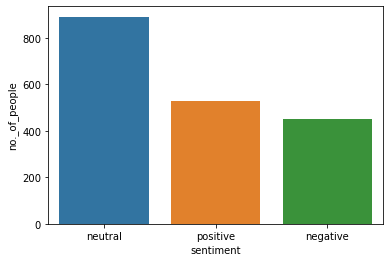

In [15]:
sns.barplot(x='sentiment', y = 'no._of_people', data =sentiments)

In [142]:
s=pd.read_csv("/Users/hi/Desktop/data_science_wbs_school/final_project/sentiments.csv")

In [143]:
s

,Text,Like Count,Text_token,negative,neutral,positive,compound,comp_score
0,climate change scam steal tax money milankovic...,0,"['climate', 'change', 'scam', 'steal', 'tax', ...",0.610,0.325,0.065,-0.9246,negative
1,existing excess carbon dioxide atmosphere lead...,0,"['existing', 'excess', 'carbon', 'dioxide', 'a...",0.136,0.680,0.184,0.0516,neutral
2,2021 report intergovernmental panel droughts i...,5,"['2021', 'report', 'intergovernmental', 'panel...",0.168,0.710,0.123,-0.1779,neutral
3,global climate change turning knowledge action,2,"['global', 'climate', 'change', 'turning', 'kn...",0.000,1.000,0.000,0.0000,neutral
4,behind successful hoax swamp uses effectively ...,1,"['behind', 'successful', 'hoax', 'swamp', 'use...",0.196,0.448,0.356,0.6908,positive
...,...,...,...,...,...,...,...,...
117586,big philanthropy fight fund technologies mitig...,7,"['big', 'philanthropy', 'fight', 'fund', 'tech...",0.103,0.833,0.063,-0.2500,neutral
117587,climate change inaccurate fucking correct say ...,1,"['climate', 'change', 'inaccurate', 'fucking',...",0.243,0.643,0.114,-0.4215,negative
117588,little bit like global warming morphed climate...,0,"['little', 'bit', 'like', 'global', 'warming',...",0.000,0.611,0.389,0.4256,positive
117589,suggest change lifestyle reduce pollution 34 m...,0,"['suggest', 'change', 'lifestyle', 'reduce', '...",0.224,0.701,0.075,-0.4939,negative


In [16]:
# wordcloud for positive tweets
positive = data.query('comp_score == "positive"')
positive

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
3,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779,positive
4,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779,positive
6,last hiked rwenzoris guide told looking open r...,africa,2022,August,"['last', 'hiked', 'rwenzoris', 'guide', 'told'...",0.000,0.823,0.177,0.6249,positive
10,better worldethiopia would deserved rewards be...,africa,2022,August,"['better', 'worldethiopia', 'would', 'deserved...",0.120,0.437,0.443,0.8779,positive
11,warmingthe ice sheet gained 7 gigatons mass on...,africa,2022,August,"['warmingthe', 'ice', 'sheet', 'gained', '7', ...",0.000,0.684,0.316,0.7184,positive
...,...,...,...,...,...,...,...,...,...,...
1924,nina like question please,africa,2018,March,"['nina', 'like', 'question', 'please']",0.000,0.294,0.706,0.5859,positive
1926,boi im fine talked using coal generate energy ...,africa,2018,March,"['boi', 'im', 'fine', 'talked', 'using', 'coal...",0.000,0.679,0.321,0.7906,positive
1927,sunny area,africa,2018,March,"['sunny', 'area']",0.000,0.263,0.737,0.4215,positive
1929,comes fossil fuels like coal natural gas going...,africa,2018,March,"['comes', 'fossil', 'fuels', 'like', 'coal', '...",0.167,0.573,0.260,0.4215,positive


In [153]:
positive['Text'][117582]

'man michelle net ofyam didnt know thought everyone arms global warming thought natural climate change'

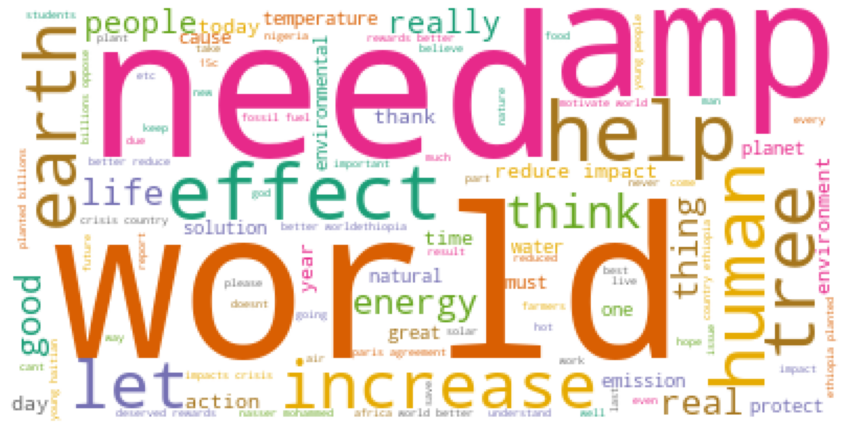

In [17]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(positive['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud

In [18]:
negative = data.query('comp_score == "negative"')

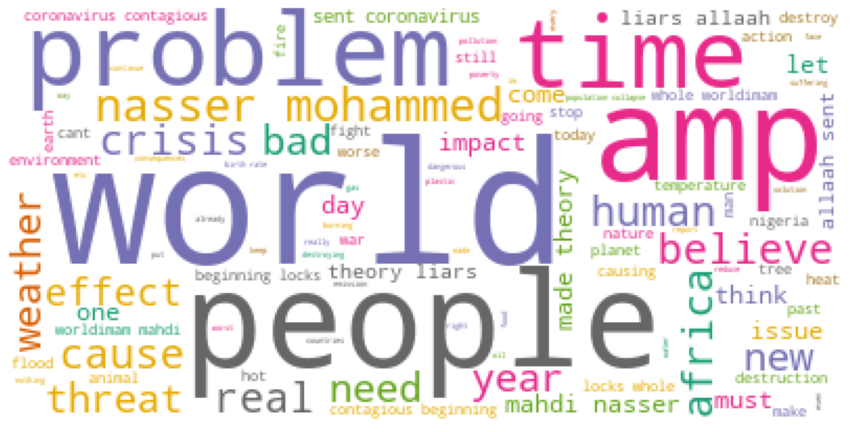

In [19]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(negative['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
neutral = data.query('comp_score == "neutral"')
neutral

,content,place,year,month,content_token,negative,neutral,positive,compound,comp_score
1,stopppppp stop ittttttt,africa,2022,August,"['stopppppp', 'stop', 'ittttttt']",0.524,0.476,0.000,-0.2960,neutral
2,need stop grow become old man working bodega f...,africa,2022,August,"['need', 'stop', 'grow', 'become', 'old', 'man...",0.196,0.804,0.000,-0.2960,neutral
8,wan dey cause,africa,2022,August,"['wan', 'dey', 'cause']",0.000,1.000,0.000,0.0000,neutral
9,also cited another factor heavy downpour exper...,africa,2022,August,"['also', 'cited', 'another', 'factor', 'heavy'...",0.000,1.000,0.000,0.0000,neutral
12,nm btw solve,africa,2022,August,"['nm', 'btw', 'solve']",0.000,0.526,0.474,0.2023,neutral
...,...,...,...,...,...,...,...,...,...,...
1944,melting snows focuses attention real story pla...,africa,2018,February,"['melting', 'snows', 'focuses', 'attention', '...",0.000,0.833,0.167,0.2023,neutral
1945,man thing comes mind explain many people losin...,africa,2018,February,"['man', 'thing', 'comes', 'mind', 'explain', '...",0.123,0.805,0.072,-0.2691,neutral
1946,real,africa,2018,February,['real'],0.000,1.000,0.000,0.0000,neutral
1948,lest engulfed stop,africa,2018,February,"['lest', 'engulfed', 'stop']",0.524,0.476,0.000,-0.2960,neutral


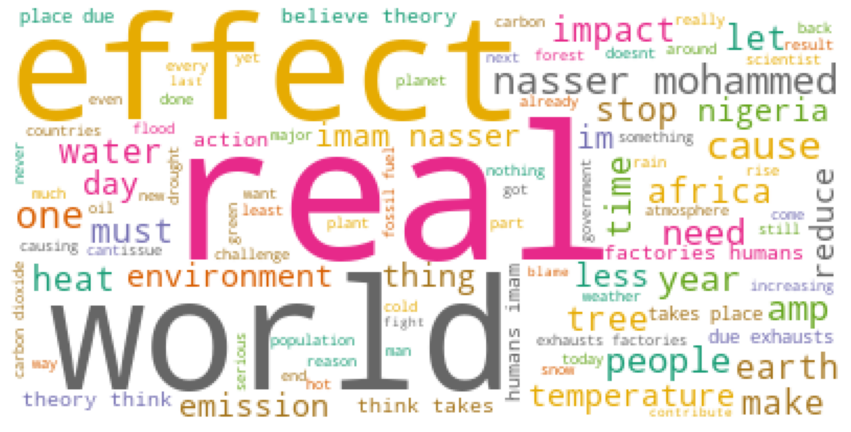

In [21]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(neutral['content'].astype(str).values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_words=100, contour_width=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [152]:
data['Text'][117578]

'yall mfs stupid global warming means climate change snowing yes effect global warming'